In this week's homework assignment we want you to start playing around with different classifiers and try to submit a prediction to the Kaggle competition. Nothing fancy, just so you won't try to do that the first time in the last day before the due date.

This notebook is designed to assist you in playing around with those classifiers, though most of the code is already in the homework assignment writeup.

In [1]:
# Import all required libraries
from __future__ import division # For python 2.*

import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

np.random.seed(0)
%matplotlib inline

## Data Loading
In the homework assignment you are going to use iris for the playing around part, here we'll just use a sample of the Kaggle data.

In [2]:
# Data Loading
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)

# The test data
Xte = np.genfromtxt('data/X_test.txt', delimiter=None)

All your work should be done on the training data set. To be able to make educated decisions on which classifier you're going to use, you should split it into train and validation data sets.

In [8]:
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
Xtr, Ytr = ml.shuffleData(Xtr, Ytr)

# Taking a subsample of the data so that trains faster.  You should train on whole data for homework and Kaggle.
Xt, Yt = Xtr[:4000], Ytr[:4000] 

## World of Classifiers
Time to start doing some classifications. We'll use all those you are required to from the assignment on the data. We'll skip the KNN one, if you want a reminder on how to use them see previous discussions.

### IMPORTANT NOTE!!! 
For the Kaggle dataset you need to submit probabilities and not just class predictions. Don't worry, you don't need to code that, just use the predictSoft() function. 

# Decision Tree

In [9]:
# The decision tree classifier has minLeaf and maxDepth parameters. You should know what it means by now.
learner = ml.dtree.treeClassify(Xt, Yt, minLeaf=25, maxDepth=15)

# Prediction
probs = learner.predictSoft(Xte)

The predictSoft method returns an $M \times C$ table in which for each point you have the proability of each class.

In [11]:
probs

array([[ 0.75      ,  0.25      ],
       [ 0.90384615,  0.09615385],
       [ 0.92424242,  0.07575758],
       ..., 
       [ 0.94827586,  0.05172414],
       [ 0.7175    ,  0.2825    ],
       [ 0.98214286,  0.01785714]])

We can also compute the AUC for both the training and validation data sets.

In [12]:
print("{0:>15}: {1:.4f}".format('Train AUC', learner.auc(Xt, Yt)))
print("{0:>15}: {1:.4f}".format('Validation AUC', learner.auc(Xva, Yva)))

      Train AUC: 0.8066
 Validation AUC: 0.6209


Play with different parameters to see how AUC changes.

# Printing decision tree
Funny enough, whoever wrote the decision tree classifier provided a printing mechanism. However, it only works up to depth 2, so not very useful for us.

In [13]:
learner = ml.dtree.treeClassify()
learner.train(Xt, Yt, maxDepth=2)
print (learner)

  if x[0] < 237.245000:
    if x[2] < 242.215000:
      Predict [ 0.45227996  0.54772004]
    else:
      Predict [ 0.69883041  0.30116959]
  else:
    if x[0] < 249.030000:
      Predict [ 0.69539337  0.30460663]
    else:
      Predict [ 0.79384134  0.20615866]



# Linear Classifier 

In [14]:
# Scaling the data
XtrP, params = ml.rescale(Xt)
XteP,_    = ml.rescale(Xte, params)

print(XtrP.shape, XteP.shape)

((4000, 14), (200000, 14))


<b> Note that we do not need to scale the data for decision tree. </b>

In [15]:
## Linear models:
learner = ml.linearC.linearClassify()
learner.train(XtrP, Yt, initStep=0.5, stopTol=1e-6, stopIter=100)

probs = learner.predictSoft(XteP)

mltools/base.py:97: RuntimeWarning: divide by zero encountered in log
  return - np.mean( np.log( P[ np.arange(M), Y ] ) ) # evaluate
mltools/linearC.py:134: RuntimeWarning: invalid value encountered in double_scalars
  done = (it > stopIter) or ( (it>1) and (abs(Jsur[-1]-Jsur[-2])<stopTol) )


And the AUC IS:

In [16]:
print("{0:>15}: {1:.4f}".format('Train AUC',learner.auc(XtrP, Yt)))
print("{0:>15}: {1:.4f}".format('Validation AUC', learner.auc(Xva, Yva)))

      Train AUC: 0.6472
 Validation AUC: 0.5763


mltools/linearC.py:82: RuntimeWarning: overflow encountered in exp
  prob = np.exp(resp)
mltools/linearC.py:84: RuntimeWarning: invalid value encountered in divide
  prob /= prob + 1.0       # logistic transform (binary classification; C=1)


This is why we're using a validation data set. We can see already that for THIS specific configuration the decision tree is much better. It is very likely that it'll be better on the test data.

# Neural Network

Yeah, even that is given to you in the mltools package. We'll use it in our examples. Havign said that, if you want to use some more fancy packages you are more than welcome to do that.


In [17]:
nn = ml.nnet.nnetClassify()

After we construct the classifier, we can define the sizes of its layers and initialize their values with "init_weights".

Definition of nn.init_weights:

        nn.init_weights(self, sizes, init, X, Y)

From the method description: sizes = [Ninput, N1, N2, ... , Noutput], where Ninput = # of input features, and Nouput = # classes

Training the model using gradient descent, we can track the surrogate loss (here, MSE loss on the output vector, compared to a 1-of-K representation of the class), as well as the 0/1 classification loss (error rate):

In [18]:
nn.init_weights([14, 5, 3], 'random', Xt, Yt)
nn.train(Xt, Yt, stopTol=1e-8, stepsize=.25, stopIter=50)

ValueError: layers[-1] must equal the number of classes in Y, or 1 for binary Y

## WHAT DID WE DO WRONG?

In [19]:
# Need to specify the right number of input and output layers.
nn.init_weights([Xt.shape[1], 5, len(np.unique(Yt))], 'random', Xt, Yt)
nn.train(Xt, Yt, stopTol=1e-8, stepsize=.25, stopIter=50)  # Really small stopIter so it will stop fast :)

it 1 : Jsur = 0.47925647513, J01 = 0.37075
it 2 : Jsur = 0.45087445509, J01 = 0.338
it 4 : Jsur = 0.440295025234, J01 = 0.338
it 8 : Jsur = 0.435756998811, J01 = 0.338
it 16 : Jsur = 0.434546834594, J01 = 0.338
it 32 : Jsur = 0.434583482503, J01 = 0.338


In [20]:
print("{0:>15}: {1:.4f}".format('Train AUC',nn.auc(Xt, Yt)))
print("{0:>15}: {1:.4f}".format('Validation AUC', nn.auc(Xva, Yva)))

      Train AUC: 0.5980
 Validation AUC: 0.5864


The AUC results are bad because we just used a lame configuration of the NN. NN can be engineered until your last day, but some things should make sense to you.

One example is the option to change the activation function. This is the function that is in the inner layers. By default the code comes with the tanh, but the logistic (sigmoid) is also coded in and you can just specify it.

In [21]:
nn.setActivation('logistic')

nn.train(Xt, Yt, stopTol=1e-8, stepsize=.25, stopIter=100)
print("{0:>15}: {1:.4f}".format('Train AUC',nn.auc(Xt, Yt)))
print("{0:>15}: {1:.4f}".format('Validation AUC', nn.auc(Xva, Yva)))

mltools/nnet.py:218: RuntimeWarning: overflow encountered in exp
  self.Sig = lambda z: twod(1 / (1 + np.exp(-z)))


it 1 : Jsur = 0.458825806628, J01 = 0.338
it 2 : Jsur = 0.43642534055, J01 = 0.338
it 4 : Jsur = 0.434239193086, J01 = 0.34525
it 8 : Jsur = 0.434265730738, J01 = 0.33475
it 16 : Jsur = 0.434615784277, J01 = 0.33375
it 32 : Jsur = 0.435318057891, J01 = 0.33525
it 64 : Jsur = 0.43622797736, J01 = 0.338
      Train AUC: 0.5827
 Validation AUC: 0.5720


### Writing your own activation function

Not suprisingly, you can also provide a custom activation function. Note that for the last layer you will probably always want the sigmoid function, so only change the inner layers ones.

The function definition is this:

    setActivation(self, method, sig=None, d_sig=None, sig_0=None, d_sig_0=None)
    
You can call it with method='custom' and then specify both sig and d_sig. (the '0' ones are for the last layer)

In [23]:
# Here's a dummy activation method (f(x) = x)
sig = lambda z: np.atleast_2d(z)
dsig = lambda z: np.atleast_2d(1)

In [24]:
nn = ml.nnet.nnetClassify()
nn.init_weights([Xt.shape[1], 5, len(np.unique(Yt))], 'random', Xt, Yt)

nn.setActivation('custom', sig, dsig)

nn.train(Xt, Yt, stopTol=1e-8, stepsize=.25, stopIter=100)
print("{0:>15}: {1:.4f}".format('Train AUC',nn.auc(Xt, Yt)))
print("{0:>15}: {1:.4f}".format('Validation AUC', nn.auc(Xva, Yva)))

mltools/nnet.py:48: RuntimeWarning: overflow encountered in exp
  self.Sig0 = lambda Z: 1.0/(1.0 + np.exp(-Z))   # final layer nonlinearity & derivative


it 1 : Jsur = nan, J01 = 0.338
it 2 : Jsur = nan, J01 = 0.338
it 4 : Jsur = nan, J01 = 0.338
it 8 : Jsur = nan, J01 = 0.338
it 16 : Jsur = nan, J01 = 0.338
it 32 : Jsur = nan, J01 = 0.338
it 64 : Jsur = nan, J01 = 0.338
      Train AUC: 0.5198
 Validation AUC: 0.4999


## Plotting
We've learn that one way of guessing how well we're doing with different model parameters is to plot the train and validation errors as a function of that paramter (e.g, k in the KNN of degree in the linear classifier and regression).

Now it seems like there could be more parameters involved? One example is the degree and the regularizer value (see. HW assignment for more examples).

When it's two features you can simple use heatmaps. The X-axis and Y-axis represent the parameters and the "heat" is the validation/train error as a "third" dimension".

We're going to use a dummy function to show that. Let's assume we have two parameters p1 and p2 and the prediction accuracy is p1 + p2 (yup, that stupid). In the HW assignment it's actually the auc.

In [25]:
p1 = np.arange(5)
p2 = np.arange(5)

In [26]:
auc = np.zeros([p1.shape[0], p2.shape[0]])
for i in range(p1.shape[0]):
    for j in range(p2.shape[0]):
        auc[i][j] = p1[i] + p2[j]

In [27]:
auc

array([[ 0.,  1.,  2.,  3.,  4.],
       [ 1.,  2.,  3.,  4.,  5.],
       [ 2.,  3.,  4.,  5.,  6.],
       [ 3.,  4.,  5.,  6.,  7.],
       [ 4.,  5.,  6.,  7.,  8.]])

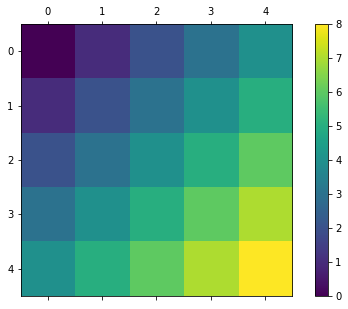

In [28]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))

cax = ax.matshow(auc)
f.colorbar(cax)

ax.set_xticks(p1)
ax.set_xticklabels(['%d' % p for p in p1])

ax.set_yticks(p2)
ax.set_yticklabels(['%d' % p for p in p2])

plt.show()

<h2> For homework: <br> <br>

x and y will be hyperparameters of the model <br>
f will be some performance metric (error, AUC etc.) </h2>


<br>

## Submitting Predictions

Let's assume that the last classifier we ran was the best one (after we used all that we know to verify it is the best one including that plot from the previoud block). Now let's run it on the test and create a file that can be submitted.

Each line in the file is a point id and the probability of P(Y=1). There's also a header file. Here's how you can create it simply from the probs matrix.

In [29]:
probs

array([[ 0.7794684 ,  0.2205316 ],
       [ 0.56946355,  0.43053645],
       [ 0.81647372,  0.18352628],
       ..., 
       [ 0.80571669,  0.19428331],
       [ 0.72670118,  0.27329882],
       [ 0.73208128,  0.26791872]])

In [30]:
# Create the data for submission by taking the P(Y=1) column from probs and just add a running index as the first column.
Y_sub = np.vstack([np.arange(Xte.shape[0]), probs[:, 1]]).T

# We specify the header (ID, Prob1) and also specify the comments as '' so the header won't be commented out with
# the # sign.
np.savetxt('data/Y_sub.txt', Y_sub, '%d, %.5f', header='ID,Prob1', comments='', delimiter=',')